# Neural Networks with XGBoost and ANNs

Artificial neural networks, usually simply called neural networks, are computing systems inspired by the biological neural networks that constitute animal brains. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.
![title](xg.png)
XGBoost is an open-source software library that implements optimized distributed gradient boosting machine learning algorithms under the Gradient Boosting framework.


XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

It’s vital to an understanding of XGBoost to first grasp the machine learning concepts and algorithms that XGBoost builds upon: supervised machine learning, decision trees, ensemble learning, and gradient boosting.

Supervised machine learning uses algorithms to train a model to find patterns in a dataset with labels and features and then uses the trained model to predict the labels on a new dataset’s features.

This dataset is used to predict whether or not a patient has diabetes, based on given features/diagnostic measurements. • 

Only female patients are considered with at least 21 years old of Pima Indian heritage. 

Inputs: 
* Pregnancies: Number of times pregnant 
* GlucosePlasma: glucose concentration a 2 hours in an oral glucose tolerance test 
* BloodPressure: Diastolic blood pressure (mm Hg) o Skin: ThicknessTriceps skin fold thickness (mm) 
* Insulin: 2-Hour serum insulin (mu Wm!) 
* BMI: Body mass index (weight in kg/(height in m)^2) 
* DiabetesPedigreeFunction: Diabetes pedigree function 
* Age: Age (years) Outputs: 
* Diabetes or no diabetes (0 or 1) 

In [68]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# You have to include the full link to the csv file containing your dataset
diabetes = pd.read_csv('diabetes.csv')

In [70]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [73]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# PERFORM DATA VISUALIZATION

<AxesSubplot:xlabel='Outcome', ylabel='count'>

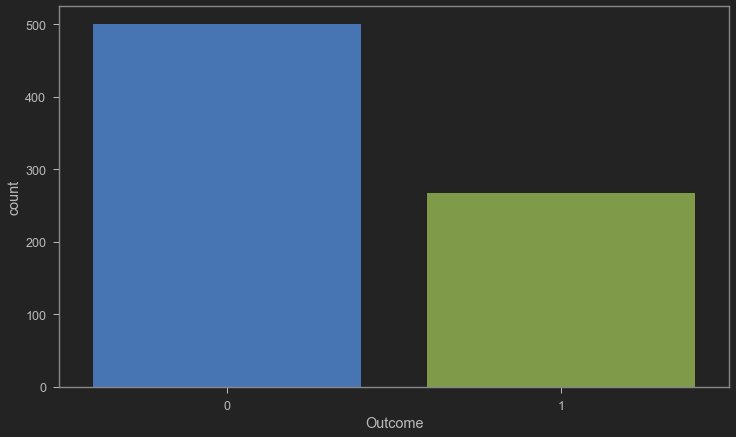

In [75]:
plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', data = diabetes)

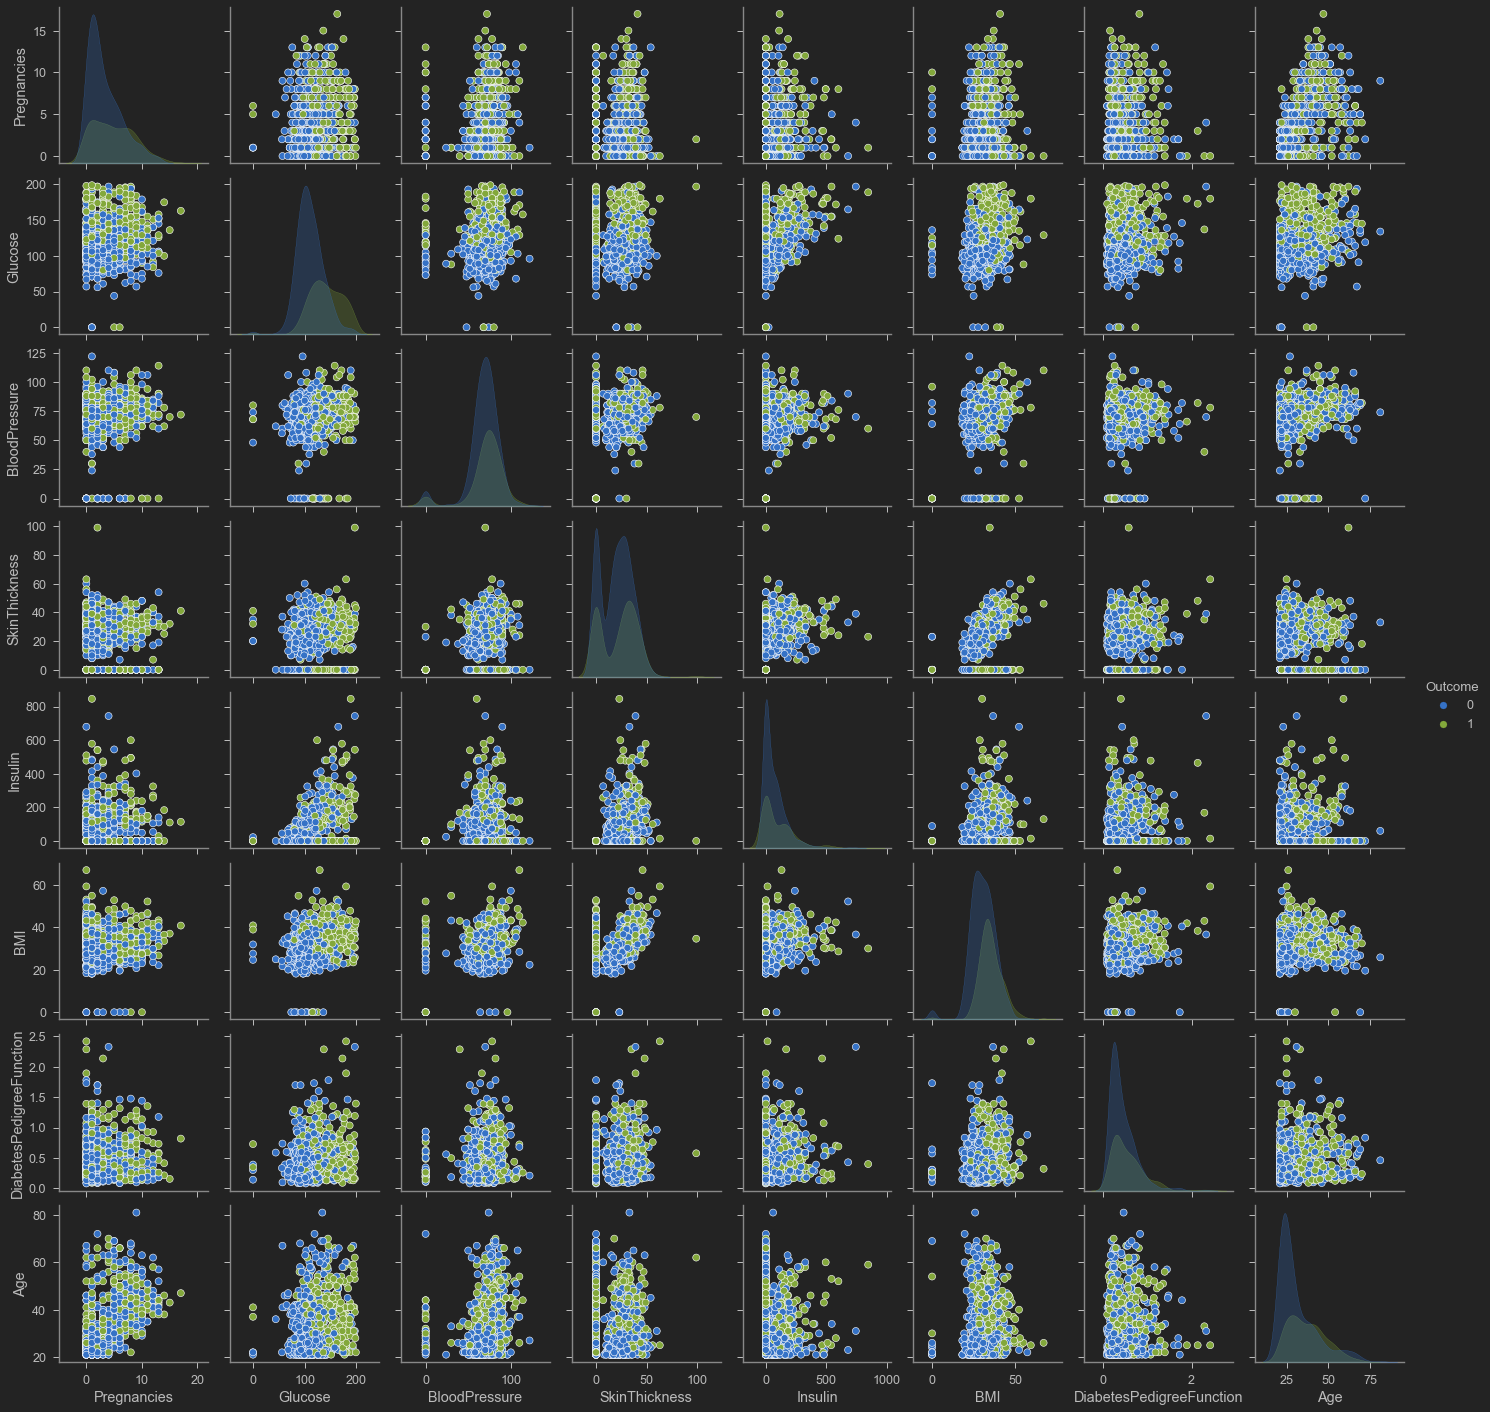

In [76]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# SPLIT THE DATA AND PREPARE IT FOR TRAINING

In [17]:
X = diabetes.iloc[:, 0:8].values

In [18]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
y = diabetes.iloc[:, 8].values

In [20]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [21]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [22]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [24]:
X_train.shape

(614, 8)

In [25]:
X_test.shape

(154, 8)

# BUILD A NEURAL NETWORK MODEL USING KERAS

In [26]:
# !pip install tensorflow
import tensorflow as tf

ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape=(8, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [27]:
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 401       
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


# COMPILE AND TRAIN THE ANN MODEL

In [28]:
ANN_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [29]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 2s 6ms/step - loss: 0.5430 - accuracy: 0.7427
Epoch 2/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4681 - accuracy: 0.7785
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4477 - accuracy: 0.7866
Epoch 4/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4454 - accuracy: 0.7883
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.4260 - accuracy: 0.7883
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4341 - accuracy: 0.7834
Epoch 7/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4247 - accuracy: 0.7834
Epoch 8/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.7964
Epoch 9/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.7818
Epoch 10/200
20/20 [==============================] - 0s 5ms/step - loss: 0.4052 - accuracy: 0.8225
Epoch 11/

20/20 [==============================] - 0s 5ms/step - loss: 0.1514 - accuracy: 0.9430
Epoch 84/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1417 - accuracy: 0.9479
Epoch 85/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1491 - accuracy: 0.9414
Epoch 86/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1587 - accuracy: 0.9349
Epoch 87/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1861 - accuracy: 0.9088
Epoch 88/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1463 - accuracy: 0.9446
Epoch 89/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1462 - accuracy: 0.9430
Epoch 90/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1423 - accuracy: 0.9479
Epoch 91/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1216 - accuracy: 0.9674
Epoch 92/200
20/20 [==============================] - 0s 5ms/step - loss: 0.1331 - accuracy: 0.9479
Epoch 93/200


20/20 [==============================] - 0s 5ms/step - loss: 0.0455 - accuracy: 0.9886
Epoch 165/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0404 - accuracy: 0.9902
Epoch 166/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0508 - accuracy: 0.9853
Epoch 167/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9837
Epoch 168/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9886
Epoch 169/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0588 - accuracy: 0.9821
Epoch 170/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0651 - accuracy: 0.9853
Epoch 171/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0458 - accuracy: 0.9902
Epoch 172/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9919
Epoch 173/200
20/20 [==============================] - 0s 5ms/step - loss: 0.0383 - accuracy: 0.9902
Epoc

In [45]:
y_pred = ANN_model.predict(X_test)

In [46]:
#y_pred

In [47]:
y_pred = (y_pred > 0.5)

In [48]:
#y_pred

# EVALUATE TRAINED MODEL PERFORMANCE 

In [49]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

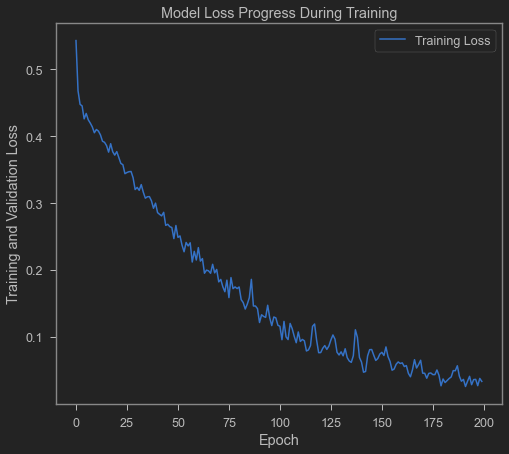

In [50]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

<AxesSubplot:>

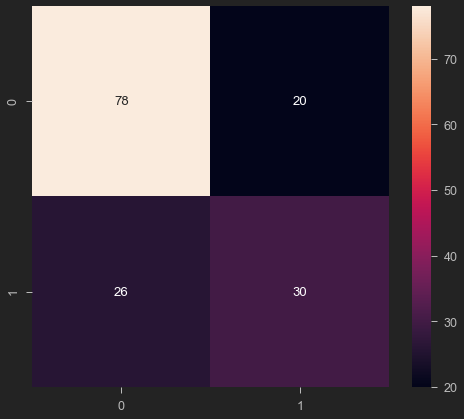

In [51]:
# Training set Performance
from sklearn.metrics import confusion_matrix
# Testing Set Performance
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [52]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        98
           1       0.60      0.54      0.57        56

    accuracy                           0.70       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.70      0.70       154



# TRAIN AND EVALUATE AN XG-BOOST ALGORITHM

In [53]:
#!pip install xgboost

In [61]:
# Train an XGBoost classifier model 
import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(X_train, y_train)

[17:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
result_train = XGB_model.score(X_train, y_train)
print("Accuracy : {}".format(result_train))

Accuracy : 0.8729641693811075


In [63]:
# predict the score of the trained model using the testing dataset

result_test = XGB_model.score(X_test, y_test)
print("Accuracy : {}".format(result_test))

Accuracy : 0.7662337662337663


In [64]:
# make predictions on the test data
y_predict = XGB_model.predict(X_test)


In [65]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.72      0.59      0.65        56

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



Text(0.5, 34.0, 'Actual class')

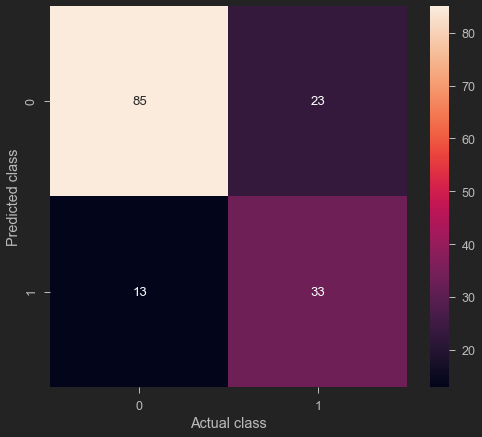

In [66]:
cm = confusion_matrix(y_predict, y_test) 
sns.heatmap(cm, annot = True)
plt.ylabel('Predicted class')
plt.xlabel('Actual class')